<a href="https://colab.research.google.com/github/victory256/Sample-ML-Repo/blob/hw02/%D0%AF%D0%BA%D1%83%D0%B1%D0%BE%D0%B2%D0%B0_hw02_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML T-Generation Занятие 2: Data Wrangling Основы работы с векторными данными и визуализацией. NumPy, Pandas и matplotlib.

# Pandas

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [1]:
import pandas as pd
import numpy as np
#магия для отображения графиков в тетрадке
%matplotlib inline 

На первое время хорошо держать под рукой шпаргалку с набором полезных функций

In [ ]:
from IPython.display import Image
Image('pandas1.png') 

In [ ]:
from IPython.display import Image
Image('pandas2.jpg') 

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [ ]:
salaries = pd.Series(data = [400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 
salaries                                                               

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64

In [ ]:
# тут можно наблюдать "консистентность" между библиотеками numpy и pandas
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [ ]:
salaries.Andrew == salaries['Andrew']

True

In [ ]:
salaries['Andrew'], salaries.Andrew

(400, 400)

**Series поддерживает пропуски в данных.**

In [ ]:
salaries['Carl'] = np.nan
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [ ]:
salaries['Carl']

In [ ]:
salaries

In [ ]:
salaries.fillna(salaries.median(), inplace=True)

In [ ]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [ ]:
print('Второй элемент серии', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print(len(salaries[salaries > 0]), 'Положительных значение\n')

Второй элемент серии 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

5 Положительных значение



In [ ]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

Можно передавать в функции numpy

In [ ]:
print(np.exp(salaries))

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64


### DataFrame

### Создание и изменение

**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [ ]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.070005,a,False
1,0.066694,b,False
2,0.641112,c,False
3,0.102071,d,True
4,0.587121,e,True


In [ ]:
type(df2)

pandas.core.frame.DataFrame

**Обращение к элементам (или целым кускам фрейма):**

In [ ]:
print('Элемент на 3 позиции в столбце 3 = ', df2.at[3, 'B'], '\n')
print(df2.loc[1:4, 'A':'C'])

Элемент на 3 позиции в столбце 3 =  d 

          A  B      C
1  0.066694  b  False
2  0.641112  c  False
3  0.102071  d   True
4  0.587121  e   True


**Изменение элементов и добавление новых:**

In [ ]:
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.070005,a,False
1,0.066694,b,False
2,0.641112,f,False
3,0.102071,d,True
4,0.587121,e,True


In [ ]:
df2.loc[4]

A    0.587121
B           e
C        True
Name: 4, dtype: object

In [ ]:
df2.loc[4] = [3.1415, 'c', False]
df2

,A,B,C
0,0.070005,a,False
1,0.066694,b,False
2,0.641112,f,False
3,0.102071,d,True
4,3.141500,c,False


In [ ]:
df1 = df2.copy()
df1

,A,B,C
0,0.070005,a,False
1,0.066694,b,False
2,0.641112,f,False
3,0.102071,d,True
4,3.141500,c,False


In [ ]:
#df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2).reset_index()
df3=df3.drop(df3.columns[0],axis=1)
df3.columns   #.drop(columns=['index'])
df3

,A,B,C
0,0.070005,a,False
1,0.066694,b,False
2,0.641112,f,False
3,0.102071,d,True
4,3.141500,c,False
5,0.070005,a,False
6,0.066694,b,False
7,0.641112,f,False
8,0.102071,d,True
9,3.141500,c,False


### Обработка пропущенных значений

In [ ]:
df1.at['o2', 'A'] = np.nan
#df1.at['o4', 'C'] = np.nan
df1

,A,B,C
0,0.070005,a,False
1,0.066694,b,False
2,0.641112,f,False
3,0.102071,d,True
4,3.141500,c,False
o2,NaN,NaN,NaN


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [ ]:
pd.isnull(df1)
pd.isnull(df1).sum()

A    1
B    1
C    1
dtype: int64

**Можно удалить все строки, где есть хотя бы один пропуск.**

In [ ]:
df1

,A,B,C
0,0.070005,a,False
1,0.066694,b,False
2,0.641112,f,False
3,0.102071,d,True
4,3.141500,c,False
o2,NaN,NaN,NaN


In [ ]:
df1.dropna(axis=0)

,A,B,C
0,0.070005,a,False
1,0.066694,b,False
2,0.641112,f,False
3,0.102071,d,True
4,3.141500,c,False


In [ ]:
df1

,A,B,C
0,0.070005,a,False
1,0.066694,b,False
2,0.641112,f,False
3,0.102071,d,True
4,3.141500,c,False
o2,NaN,NaN,NaN


In [ ]:
df1.shape

(6, 3)

In [ ]:
df1.shape[0]*[0]

[0, 0, 0, 0, 0, 0]

In [ ]:
df1['D'] = df1.shape[0]*[np.nan]

In [ ]:
df1

,A,B,C,D
0,0.070005,a,False,NaN
1,0.066694,b,False,NaN
2,0.641112,f,False,NaN
3,0.102071,d,True,NaN
4,3.141500,c,False,NaN
o2,NaN,NaN,NaN,NaN


In [ ]:
df1.dropna(how='all', axis=1)

,A,B,C
0,0.070005,a,False
1,0.066694,b,False
2,0.641112,f,False
3,0.102071,d,True
4,3.141500,c,False
o2,NaN,NaN,NaN


**Пропуски можно заменить каким-то значением.**

In [ ]:
df1.fillna(0)

,A,B,C,D
0,0.070005,a,False,0.0
1,0.066694,b,False,0.0
2,0.641112,f,False,0.0
3,0.102071,d,True,0.0
4,3.141500,c,False,0.0
o2,0.000000,0,0,0.0


## Пример первичного анализа данных с Pandas

In [ ]:
#import os
import pandas as pd

Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

Скачаем данные:

In [ ]:
pass_data = pd.read_csv('titanic.csv', sep='\t')

Данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [ ]:
pass_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


In [ ]:
pass_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
pass_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


Посмотрим на признаки:

In [ ]:
pass_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

В этом ноутбуке мы думали, что названия столбцов начинаются с маленькой буквы, а в данных первая буква заглавная, придется исправить:

In [ ]:
pass_data.info()

In [ ]:
pass_data = pass_data.rename(str.lower, axis="columns")

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [ ]:
pass_data[2:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [ ]:
pass_data.iloc[1:5, 1:3]

In [ ]:
pass_data.loc[1:5, "survived":"pclass"]

In [ ]:
pass_data['name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [ ]:
pass_data[['name', 'sex', 'pclass']].head()

Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [ ]:
pass_data[pass_data['sex'] == 'female'].head() # женщины на борту

In [ ]:
pass_data.shape

In [ ]:
# TASK: вывести женщин старше 60 и мужчины на борту
# Ваш код здесь
pass_data[(pass_data['age']>60) | (pass_data['sex'] == 'male')].head(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S


& - и | - или

In [ ]:
# проверяем, что female - это лишнее условие
tab1 = pass_data[(pass_data['age']>60) | (pass_data['sex'] == 'male')]
tab2 = pass_data[((pass_data['age']>60) & (pass_data['sex'] == 'female')) | (pass_data['sex'] == 'male')]
pd.concat([tab1,tab2]).drop_duplicates(keep=False)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


In [ ]:
# TASK: Посмотрим, сколько на борту было относительно молодых женщин,
# путешествующих в одиночку. Скорее всего, довольно мало,
# потому что в такое длительное путешествие молодых девушек одних не отпустили бы опекающие родственники.
# Ваш код здесь
pass_data[(pass_data['age']<30) & (pass_data['sex'] == 'female') & (pass_data['sibsp'] == 0)].shape
# ответ = 13

(13, 12)

Кроме того, для заданного признака можно построить гистограмму:

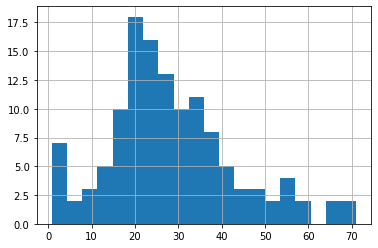

In [ ]:
pass_data.age.hist(bins = 20)
None

## Редактирование DataFrame

* Переименование признаков

In [ ]:
pass_data.rename(columns={'sex': 'Sex'}, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Применение преобразования к существующему признаку. Например, выделим фамилию:

In [ ]:
# TASK: написать функцию возвращающее фамилию
def get_last_name(str_name):
    return str_name.split(',')[0]

In [ ]:
get_last_name('Cumings, Mrs. John Bradley')

'Cumings'

* Добавление признака

In [ ]:
pass_data['Last_name'] = pass_data['name'].apply(get_last_name)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


* Удаление признака

In [ ]:
pass_data.drop('Last_name', axis=1).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [ ]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Работа с пропущенными данными

In [ ]:
pass_data.info()

Методы isnull() и notnull() позволяют получить бинарный массив, отражающий отсутствие или наличие данных для каждого из объектов соответственно:

In [ ]:
pass_data['cabin'].isnull()

pass_data[pass_data['cabin'].notnull()].head() # пассажиры с известным номером шлюпки эвакуации

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


* Сортировка объектов/признаков

In [ ]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [ ]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

## Группировка данных

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [ ]:
pass_data.groupby('Sex') # разбиение всех объектов на 2 группы по полу

In [ ]:
pass_data.groupby('Sex')['pclass'].value_counts()

Sex     pclass
female  3         35
        2         12
        1          9
male    3         61
        1         21
        2         18
Name: pclass, dtype: int64

In [ ]:
pass_data.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,30.0,79.50194,65.172104,26.2833,48.290625,61.6792,78.721875,263.0000
2,30.0,23.65972,16.048141,10.5000,13.000000,21.0000,27.312500,73.5000
3,96.0,13.44006,9.998511,6.7500,7.854200,8.0500,15.309350,56.4958


In [ ]:
pass_data.groupby('Sex')['age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    24.468085
male      30.326962
Name: age, dtype: float64

Как известно, в первую очередь спасали женщин и детей в порядке повышения номера класса, в связи с этим доля выживших женщин, вероятно, будет выше, чем доля выживших мужчин. Проверим:

In [ ]:
pass_data.groupby('Sex')['survived'].mean()

Sex
female    0.714286
male      0.140000
Name: survived, dtype: float64

Аналогично для пассажиров различных классов:

In [ ]:
pass_data.groupby('pclass')[['survived', 'age']].mean()

,survived,age
pclass,,
1,0.400000,38.111111
2,0.466667,28.114828
3,0.291667,24.307143


Рассмотренные выше статистические данные могут быть рассмотрены и в виде стандартного DataFrame:

In [ ]:
pass_data.groupby('Sex', as_index=False)['survived'].mean()

,Sex,survived
0,female,0.714286
1,male,0.140000


## Сохранение данных

Также данные можно сохранить в файл:

In [ ]:
pass_data.to_csv('titanic_2.csv', index=False)

# Самостоятельная работа  №2 

In [2]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [3]:
# 1. создать датафрейм
animals = pd.DataFrame(data = data, index = labels)
animals

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [4]:
# Вывести первые 3 строки
animals.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [5]:
# Вывести значения где пропущены age
animals[animals['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [6]:
# Вывести сумму всех посещений
animals['visits'].sum()

19

In [7]:
# Посчитать количество каждого типа в колонке animal
animals['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

In [8]:
# Сохранить в формате csv
animals.to_csv('animals.csv', index=False)